In [ ]:
import cv2
import os
import warnings

warnings.filterwarnings("ignore")


def FormatDataset(dataset_src, dataset_dest, classes):
    
    new_cropped_dest = [os.path.join(dataset_dest, cls, 'CROPPED') for cls in classes]
    new_complete_dest = [os.path.join(dataset_dest, cls, 'COMPLETE') for cls in classes]

    
    cropped_src = [os.path.join(dataset_src, f'im_{cls}', 'CROPPED') for cls in classes]
    complete_src = [os.path.join(dataset_src, f'im_{cls}') for cls in classes]

    for (dest1, dest2) in zip(new_cropped_dest, new_complete_dest):
        os.makedirs(dest1, exist_ok=True)
        os.makedirs(dest2, exist_ok=True)

    
    for (src, new_dest) in zip(cropped_src, new_cropped_dest):
        if os.path.exists(src): 
                filename, file_ext = os.path.splitext(file)
                if file_ext == '.bmp':
                    img_des = os.path.join(new_dest, filename + '.jpg')
                    img = cv2.imread(os.path.join(src, file))
                    img = cv2.resize(img, (64, 64))
                    img = cv2.copyMakeBorder(img, 1, 1, 1, 1, cv2.BORDER_CONSTANT, value=0)
                    img = cv2.blur(img, (2, 2))
                    cv2.imwrite(img_des, img)
        else:
            print(f"Directory not found: {src}")

    
    for (src, new_dest) in zip(complete_src, new_complete_dest):
        if os.path.exists(src):  
            for file in os.listdir(src):
                filename, file_ext = os.path.splitext(file)
                if file_ext == '.bmp':
                    img_des = os.path.join(new_dest, filename + '.jpg')
                    img = cv2.imread(os.path.join(src, file))
                    img = cv2.resize(img, (256, 256))
                    img = cv2.copyMakeBorder(img, 2, 2, 2, 2, cv2.BORDER_CONSTANT, value=0)
                    img = cv2.blur(img, (2, 2))
                    cv2.imwrite(img_des, img)
        else:
            print(f"Directory not found: {src}")

src = '/home/iamsanko/Downloads/Test 1'
dest = './CervicalCancer'
classes = ["Dyskeratotic", "Koilocytotic", "Metaplastic", "Parabasal", "Superficial-Intermediate"]
FormatDataset(src, dest, classes)

In [38]:
root_dir = "./CervicalCancer"
classes = ["Dyskeratotic","Koilocytotic","Metaplastic","Parabasal","Superficial-Intermediate"]

def GetDatasetSize(path, classes, main = "CROPPED"):
    num_of_image = {}
    for cls in classes:
        num_of_image[cls] = len(os.listdir(os.path.join(path, cls, main)));
    return num_of_image;

print(GetDatasetSize(root_dir, classes, "COMPLETE"));

{'Dyskeratotic': 34, 'Koilocytotic': 14, 'Metaplastic': 10, 'Parabasal': 7, 'Superficial-Intermediate': 126}


In [49]:
import os
import numpy as np
import shutil
def TrainValTestSplit(root_dir, classes_dir, main="CROPPED", val_ratio=0.15, test_ratio=0.15):
    output_dir = "/home/iamsanko/Downloads/Test 1"

    for cls in classes_dir:
        src = os.path.join(root_dir, cls, main)

        
        if not os.path.exists(src):
            print(f"Warning: The folder {src} does not exist.")
            continue

       
        print(f"Contents of {src}: {os.listdir(src)}")

       
        allFileNames = os.listdir(src)
        print(f"Total images found in {src}: {len(allFileNames)}")  # Debugging line

        if len(allFileNames) == 0:
            print(f"No images found in {src}. Check the directory and file formats.")
            continue

        
        np.random.shuffle(allFileNames)
        train_FileNames, val_FileNames, test_FileNames = np.split(
            np.array(allFileNames),
            [int(len(allFileNames) * (1 - (val_ratio + test_ratio))), int(len(allFileNames) * (1 - test_ratio))]
        )

        train_FileNames = [os.path.join(src, name) for name in train_FileNames.tolist()]
        val_FileNames = [os.path.join(src, name) for name in val_FileNames.tolist()]
        test_FileNames = [os.path.join(src, name) for name in test_FileNames.tolist()]

      
        os.makedirs(os.path.join(output_dir, 'train', cls), exist_ok=True)
        os.makedirs(os.path.join(output_dir, 'val', cls), exist_ok=True)
        os.makedirs(os.path.join(output_dir, 'test', cls), exist_ok=True)

      
        print(cls, ':')
        print('Total images: ', len(allFileNames))
        print('Training: ', len(train_FileNames))
        print('Validation: ', len(val_FileNames))
        print('Testing: ', len(test_FileNames))

        for name in train_FileNames:
            shutil.copy(name, os.path.join(output_dir, 'train', cls))

        for name in val_FileNames:
            shutil.copy(name, os.path.join(output_dir, 'val', cls))

        for name in test_FileNames:
            shutil.copy(name, os.path.join(output_dir, 'test', cls))
        print()

root_dir = "./CervicalCancer"  
classes_dir = ["Dyskeratotic", "Koilocytotic", "Metaplastic", "Parabasal", "Superficial-Intermediate"]  # Classes
TrainValTestSplit(root_dir, classes_dir)


Contents of ./CervicalCancer/Dyskeratotic/CROPPED: ['004.jpg', '012.jpg', '029.jpg', '011.jpg', '005.jpg', '025.jpg', '009.jpg', '006.jpg', '016.jpg', '007.jpg', '033.jpg', '027.jpg', '034.jpg', '028.jpg', '019.jpg', '026.jpg', '010.jpg', '013.jpg', '031.jpg', '015.jpg', '017.jpg', '032.jpg', '014.jpg', '001.jpg', '024.jpg', '018.jpg', '030.jpg', '003.jpg', '022.jpg', '020.jpg', '008.jpg', '023.jpg', '002.jpg', '021.jpg']
Total images found in ./CervicalCancer/Dyskeratotic/CROPPED: 34
Dyskeratotic :
Total images:  34
Training:  23
Validation:  5
Testing:  6

Contents of ./CervicalCancer/Koilocytotic/CROPPED: ['004.jpg', '012.jpg', '011.jpg', '005.jpg', '009.jpg', '006.jpg', '007.jpg', '010.jpg', '013.jpg', '014.jpg', '001.jpg', '003.jpg', '008.jpg', '002.jpg']
Total images found in ./CervicalCancer/Koilocytotic/CROPPED: 14
Koilocytotic :
Total images:  14
Training:  9
Validation:  2
Testing:  3

Contents of ./CervicalCancer/Metaplastic/CROPPED: ['004.jpg', '005.jpg', '009.jpg', '006.jp

In [50]:
root_dir = "./CervicalCancer"
classes = ["Dyskeratotic","Koilocytotic","Metaplastic","Parabasal","Superficial-Intermediate"]

def GetDatasetSize(path, classes, main = "CROPPED"):
    num_of_image = {}
    for cls in classes:
        
        num_of_image[cls] = len(os.listdir(os.path.join(path, cls, main)));
    return num_of_image;

print(GetDatasetSize(root_dir, classes, "COMPLETE"));

{'Dyskeratotic': 34, 'Koilocytotic': 14, 'Metaplastic': 10, 'Parabasal': 7, 'Superficial-Intermediate': 126}


In [52]:
import os
import numpy as np
import shutil

def TrainValTestSplit(root_dir, classes_dir, main="CROPPED", val_ratio=0.15, test_ratio=0.15, output_dir=''):
    
    os.makedirs(os.path.join(output_dir, 'train'), exist_ok=True)
    os.makedirs(os.path.join(output_dir, 'val'), exist_ok=True)
    os.makedirs(os.path.join(output_dir, 'test'), exist_ok=True)

    for cls in classes_dir:
        
        class_train_dir = os.path.join(output_dir, 'train', cls)
        class_val_dir = os.path.join(output_dir, 'val', cls)
        class_test_dir = os.path.join(output_dir, 'test', cls)

        os.makedirs(class_train_dir, exist_ok=True)
        os.makedirs(class_val_dir, exist_ok=True)
        os.makedirs(class_test_dir, exist_ok=True)

        
        src = os.path.join(root_dir, cls, main)

        
        if not os.path.exists(src):
            print(f"Source directory {src} does not exist. Skipping class: {cls}")
            continue

        allFileNames = os.listdir(src)
        np.random.shuffle(allFileNames)

        
        total_files = len(allFileNames)
        train_size = int(total_files * (1 - (val_ratio + test_ratio)))
        val_size = int(total_files * val_ratio)

        train_FileNames, val_FileNames, test_FileNames = np.split(
            np.array(allFileNames),
            [train_size, train_size + val_size]
        )

        
        train_FileNames = [os.path.join(src, name) for name in train_FileNames.tolist()]
        val_FileNames = [os.path.join(src, name) for name in val_FileNames.tolist()]
        test_FileNames = [os.path.join(src, name) for name in test_FileNames.tolist()]

        
        print('Total images: ', total_files)
        print('Training: ', len(train_FileNames))
        print('Validation: ', len(val_FileNames))
        print('Testing: ', len(test_FileNames))

        for name in train_FileNames:
            shutil.copy(name, class_train_dir)

        for name in val_FileNames:
            shutil.copy(name, class_val_dir)

        for name in test_FileNames:
            shutil.copy(name, class_test_dir)

        print()

# Train / Validation / Test Split
root_dir = "./CervicalCancer"  
classes_dir = [
    "Dyskeratotic",
    "Koilocytotic",
    "Metaplastic",
    "Parabasal",
    "Superficial-Intermediate"
]  # Classes
output_dir = './output'  
TrainValTestSplit(root_dir, classes_dir, output_dir=output_dir)


Dyskeratotic :
Total images:  34
Training:  23
Validation:  5
Testing:  6

Koilocytotic :
Total images:  14
Training:  9
Validation:  2
Testing:  3

Metaplastic :
Total images:  10
Training:  7
Validation:  1
Testing:  2

Parabasal :
Total images:  7
Training:  4
Validation:  1
Testing:  2

Superficial-Intermediate :
Total images:  831
Training:  581
Validation:  124
Testing:  126



In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Building the CNN model
class VGG16Model(nn.Module):
    def __init__(self):
        super(VGG16Model, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding='same'),
            nn.ReLU(inplace=True),
            nn.Conv2d(16, 16, kernel_size=3, padding='same'),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(16, 32, kernel_size=3, padding='same'),
            nn.ReLU(inplace=True),
            nn.Conv2d(32, 32, kernel_size=3, padding='same'),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(32, 64, kernel_size=3, padding='same'),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding='same'),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding='same'),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(64, 128, kernel_size=3, padding='same'),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding='same'),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding='same'),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(128, 256, kernel_size=3, padding='same'),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding='same'),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding='same'),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.fc_layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(256 * 2 * 2, 2048),  # taking input size 64x64
            nn.ReLU(inplace=True),
            nn.Linear(2048, 2048),
            nn.ReLU(inplace=True),
            nn.Linear(2048, 5),
            nn.Softmax(dim=1)
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = self.fc_layers(x)
        return x


model = VGG16Model()


print(model)

# The loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [53]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision import datasets
from torch.utils.data import DataLoader, random_split
import numpy as np

# The Generator
class Generator(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, output_dim),
            nn.Tanh()
        )

    def forward(self, z):
        return self.model(z)

class Discriminator(nn.Module):
    def __init__(self, input_dim):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)


z_dim = 100  # Latent dimension
data_dim = 64 * 64 * 3  # Image size for cells (64x64 RGB)
generator = Generator(z_dim, data_dim)
discriminator = Discriminator(data_dim)

# Loss and optimizers
criterion = nn.BCELoss()
optimizer_G = optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))

In [54]:
root_dir = "./CervicalCancer"  
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
])

dataset = datasets.ImageFolder(root=root_dir, transform=transform)
train_size = int(0.6 * len(dataset))
val_size = int(0.2 * len(dataset))
test_size = len(dataset) - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


In [55]:
def train_gan(num_epochs):
    for epoch in range(num_epochs):
        for i, (images, _) in enumerate(train_loader):
            batch_size = images.size(0)
            images = images.view(batch_size, -1)

            real_labels = torch.ones(batch_size, 1)
            fake_labels = torch.zeros(batch_size, 1)

            # Train Discriminator
            optimizer_D.zero_grad()
            outputs = discriminator(images)
            d_loss_real = criterion(outputs, real_labels)
            d_loss_real.backward()

            z = torch.randn(batch_size, z_dim)
            fake_images = generator(z)
            outputs = discriminator(fake_images.detach())
            d_loss_fake = criterion(outputs, fake_labels)
            d_loss_fake.backward()
            optimizer_D.step()

            # Train Generator
            optimizer_G.zero_grad()
            outputs = discriminator(fake_images)
            g_loss = criterion(outputs, real_labels)
            g_loss.backward()
            optimizer_G.step()

        print(f'Epoch [{epoch}/{num_epochs}], d_loss: {d_loss_real.item() + d_loss_fake.item()}, g_loss: {g_loss.item()}')


In [61]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding='same')
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(16 * 32 * 32, 256) 
        self.fc2 = nn.Linear(256, 5)  # 5 classes

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = x.view(-1, 16 * 32 * 32) 
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

#train the CNN model
cnn_model = CNNModel()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn_model.parameters(), lr=0.001)

def train_cnn(num_epochs):
    for epoch in range(num_epochs):
        cnn_model.train()
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = cnn_model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

        print(f'Epoch [{epoch}/{num_epochs}], Loss: {loss.item()}')

# Train the GAN and CNN
train_gan(num_epochs=5)
train_cnn(num_epochs=5)


Epoch [0/5], d_loss: -0.0, g_loss: -0.0
Epoch [1/5], d_loss: -0.0, g_loss: -0.0
Epoch [2/5], d_loss: -0.0, g_loss: -0.0
Epoch [3/5], d_loss: -0.0, g_loss: -0.0
Epoch [4/5], d_loss: -0.0, g_loss: -0.0
Epoch [0/5], Loss: 0.6597757339477539
Epoch [1/5], Loss: 0.4483407735824585
Epoch [2/5], Loss: 0.5041589140892029
Epoch [3/5], Loss: 0.03810190036892891
Epoch [4/5], Loss: 0.27435240149497986


In [63]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()

        
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding='same')
        self.conv2 = nn.Conv2d(16, 16, kernel_size=3, padding='same')
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv3 = nn.Conv2d(16, 32, kernel_size=3, padding='same')
        self.conv4 = nn.Conv2d(32, 32, kernel_size=3, padding='same')
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv5 = nn.Conv2d(32, 64, kernel_size=3, padding='same')
        self.conv6 = nn.Conv2d(64, 64, kernel_size=3, padding='same')
        self.conv7 = nn.Conv2d(64, 64, kernel_size=3, padding='same')
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv8 = nn.Conv2d(64, 128, kernel_size=3, padding='same')
        self.conv9 = nn.Conv2d(128, 128, kernel_size=3, padding='same')
        self.conv10 = nn.Conv2d(128, 128, kernel_size=3, padding='same')
        self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv11 = nn.Conv2d(128, 256, kernel_size=3, padding='same')
        self.conv12 = nn.Conv2d(256, 256, kernel_size=3, padding='same')
        self.conv13 = nn.Conv2d(256, 256, kernel_size=3, padding='same')
        self.pool5 = nn.MaxPool2d(kernel_size=2, stride=2)

        
        self.flat = nn.Flatten()
        self.fc1 = nn.Linear(256 * 2 * 2, 2048)  
        self.fc2 = nn.Linear(2048, 2048)
        self.output = nn.Linear(2048, 5)  

    def forward(self, x):
        
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = self.pool1(x)

        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = self.pool2(x)

        x = F.relu(self.conv5(x))
        x = F.relu(self.conv6(x))
        x = F.relu(self.conv7(x))
        x = self.pool3(x)

        x = F.relu(self.conv8(x))
        x = F.relu(self.conv9(x))
        x = F.relu(self.conv10(x))
        x = self.pool4(x)

        x = F.relu(self.conv11(x))
        x = F.relu(self.conv12(x))
        x = F.relu(self.conv13(x))
        x = self.pool5(x)

        x = self.flat(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.output(x)
        return x

cnn_model = CNNModel()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn_model.parameters(), lr=0.001)

def train_cnn(num_epochs, train_loader):
    for epoch in range(num_epochs):
        cnn_model.train()
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = cnn_model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

        print(f'Epoch [{epoch}/{num_epochs}], Loss: {loss.item()}') ```````````````

In [64]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()

        # Convo layers for the CNN
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)  # Input shape: (64, 64, 3)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.dropout = nn.Dropout(0.25)
        self.flatten_size = 128 * 8 * 8  
        self.fc1 = nn.Linear(self.flatten_size, 64)
        self.fc2 = nn.Linear(64, 5)  

    def forward(self, x):
        # Convolutional layers with ReLU and MaxPooling
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = self.pool(x)  # Output size: (32, 32, 32)

        x = F.relu(self.conv3(x))
        x = self.pool(x)  # Output size: (64, 16, 16)

        x = F.relu(self.conv4(x))
        x = self.pool(x)  # Output size: (128, 8, 8)
        x = self.dropout(x)
        x = x.view(-1, self.flatten_size)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.sigmoid(self.fc2(x))  # Sigmoid

        return x
cnn_model = CNNModel()


optimizer = torch.optim.Adam(cnn_model.parameters(), lr=0.001)
criterion = nn.BCELoss()  

from torchsummary import summary
summary(cnn_model, (3, 64, 64))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 64, 64]             448
            Conv2d-2           [-1, 32, 64, 64]           4,640
         MaxPool2d-3           [-1, 32, 32, 32]               0
            Conv2d-4           [-1, 64, 32, 32]          18,496
         MaxPool2d-5           [-1, 64, 16, 16]               0
            Conv2d-6          [-1, 128, 16, 16]          73,856
         MaxPool2d-7            [-1, 128, 8, 8]               0
           Dropout-8            [-1, 128, 8, 8]               0
            Linear-9                   [-1, 64]         524,352
          Dropout-10                   [-1, 64]               0
           Linear-11                    [-1, 5]             325
Total params: 622,117
Trainable params: 622,117
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.05
Forward/

In [65]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, BatchNormalization, Activation, Add, Flatten, Dense
from tensorflow.keras.models import Model

input_shape = (64, 64, 3)
num_classes = 5

def identity_block(X, filters):
    F1, F2, F3 = filters

    X_shortcut = X
    X = Conv2D(F1, kernel_size=(1, 1), strides=(1, 1), padding='valid')(X)
    X = BatchNormalization()(X)
    X = Activation('relu')(X)
    X = Conv2D(F2, kernel_size=(3, 3), strides=(1, 1), padding='same')(X)
    X = BatchNormalization()(X)
    X = Activation('relu')(X)
    X = Conv2D(F3, kernel_size=(1, 1), strides=(1, 1), padding='valid')(X)
    X = BatchNormalization()(X)
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)

    return X


def convolutional_block(X, filters, stride=2):
    F1, F2, F3 = filters

    X_shortcut = X
    X = Conv2D(F1, kernel_size=(1, 1), strides=(stride, stride), padding='valid')(X)
    X = BatchNormalization()(X)
    X = Activation('relu')(X)
    X = Conv2D(F2, kernel_size=(3, 3), strides=(1, 1), padding='same')(X)
    X = BatchNormalization()(X)
    X = Activation('relu')(X)
    X = Conv2D(F3, kernel_size=(1, 1), strides=(1, 1), padding='valid')(X)
    X = BatchNormalization()(X)
    X_shortcut = Conv2D(F3, kernel_size=(1, 1), strides=(stride, stride), padding='valid')(X_shortcut)
    X_shortcut = BatchNormalization()(X_shortcut)
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)
    return X


input_tensor = Input(shape=input_shape)
X = Conv2D(64, kernel_size=(7, 7), strides=(2, 2), padding='same')(input_tensor)
X = BatchNormalization()(X)
X = Activation('relu')(X)
X = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(X)
X = convolutional_block(X, filters=[64, 64, 256], stride=1)
X = identity_block(X, filters=[64, 64, 256])
X = identity_block(X, filters=[64, 64, 256])
X = convolutional_block(X, filters=[128, 128, 512])
X = identity_block(X, filters=[128, 128, 512])
X = identity_block(X, filters=[128, 128, 512])
X = identity_block(X, filters=[128, 128, 512])
# train diff
X = convolutional_block(X, filters=[256, 256, 1024])
X = identity_block(X, filters=[256, 256, 1024])
X = identity_block(X, filters=[256, 256, 1024])
X = identity_block(X, filters=[256, 256, 1024])
X = identity_block(X, filters=[256, 256, 1024])
X = identity_block(X, filters=[256, 256, 1024])
#train diff 2
X = convolutional_block(X, filters=[512, 512, 2048])
X = identity_block(X, filters=[512, 512, 2048])
X = identity_block(X, filters=[512, 512, 2048])
# factor creator 
X = BatchNormalization()(X)
X = Activation('relu')(X)
X = Flatten()(X)
X = Dense(64, activation='relu')(X)
X = Dense(num_classes, activation='sigmoid')(X)
model = Model(inputs=input_tensor, outputs=X)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

2024-09-27 20:52:52.287723: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-27 20:52:53.237043: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-27 20:52:53.577877: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-27 20:52:55.584889: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-27 20:53:03.223044: W tensorflow/compiler/tf2

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 64, 64, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 32, 32,    │      9,472 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 32, 32,    │        256 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 32, 32,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 16, 16,    │          0 │ activation[0][0]  │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 16, 16,    │      4,160 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 16, 16,    │        256 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 16, 16,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 16, 16,    │     36,928 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 16, 16,    │        256 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 16, 16,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 16, 16,    │     16,640 │ activation_2[0][… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 16, 16,    │     16,640 │ max_pooling2d[0]… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 16, 16,    │      1,024 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 16, 16,    │      1,024 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 16, 16,    │          0 │ batch_normalizat… │
│                     │ 256)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 16, 16,    │          0 │ add[0][0]       

 Total params: 24,120,581 (92.01 MB)

 Trainable params: 24,063,365 (91.79 MB)

 Non-trainable params: 57,216 (223.50 KB)

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models


vgg16_model = models.vgg16(pretrained=True)
num_classes = 5
vgg16_model.classifier[6] = nn.Linear(in_features=4096, out_features=num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(vgg16_model.parameters(), lr=0.001)
def calculate_accuracy(output, target):
    _, predicted = torch.max(output, 1)
    correct = (predicted == target).sum().item()
    total = target.size(0)
    accuracy = correct / total
    return accuracy


def train_model(num_epochs, train_loader):
    for epoch in range(num_epochs):
        vgg16_model.train() 
        total_loss = 0
        total_accuracy = 0
        for images, labels in train_loader:
            optimizer.zero_grad() 

            # Forward passer
            outputs = vgg16_model(images)

            # Loss calculation
            loss = criterion(outputs, labels)
            total_loss += loss.item()

            # Backward passing 
            loss.backward()
            optimizer.step()
            accuracy = calculate_accuracy(outputs, labels)
            total_accuracy += accuracy
        avg_loss = total_loss / len(train_loader) 
        avg_accuracy = total_accuracy / len(train_loader)
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}, Accuracy: {avg_accuracy:.4f}')

/home/iamsanko/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/iamsanko/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /home/iamsanko/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [02:11<00:00, 4.20MB/s] 


In [6]:
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder

train_transforms = transforms.Compose([
    transforms.RandomResizedCrop(64),   
    transforms.RandomHorizontalFlip(),  
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),  
    transforms.RandomAffine(degrees=0, shear=0.2),  
    transforms.ToTensor(),               
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  
])
val_transforms = transforms.Compose([
    transforms.Resize((64, 64)),         
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
test_transforms = transforms.Compose([
    transforms.Resize((64, 64)),         g
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
train_dataset = ImageFolder(root='/home/iamsanko/Downloads/Test 1/train', transform=train_transforms)
val_dataset = ImageFolder(root='/home/iamsanko/Downloads/Test 1/val', transform=val_transforms)
test_dataset = ImageFolder(root='/home/iamsanko/Downloads/Test 1/test', transform=test_transforms)
train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=32, shuffle=False)

In [8]:
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
train_transforms = transforms.Compose([
    transforms.Resize((64, 64)),         
    transforms.RandomHorizontalFlip(),   
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2), 
    transforms.RandomAffine(degrees=0, shear=0.2),  
    transforms.ToTensor(),              
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) 
])
train_dataset = ImageFolder(root='./train', transform=train_transforms)
print(f"Found {len(train_dataset)} images belonging to {len(train_dataset.classes)} classes.")
train_loader = DataLoader(dataset=train_dataset, batch_size=100, shuffle=True)

Found 1657 images belonging to 5 classes.


In [9]:
train_dataset = ImageFolder(root='./train', transform=train_transforms)
print(train_dataset.class_to_idx)

{'Dyskeratotic': 0, 'Koilocytotic': 1, 'Metaplastic': 2, 'Parabasal': 3, 'Superficial-Intermediate': 4}


In [14]:
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import os

test_transforms = transforms.Compose([
    transforms.Resize((64, 64)),        
    transforms.ToTensor(),             
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  
])
test_dataset = ImageFolder(root='./test', transform=test_transforms)
test_loader = DataLoader(test_dataset, batch_size=100, shuffle=False)
num_images = len(test_dataset)
num_classes = len(test_dataset.classes)

print(f"Found {num_images} images belonging to {num_classes} classes.")
print(test_dataset.class_to_idx)

Found 867 images belonging to 5 classes.
{'Dyskeratotic': 0, 'Koilocytotic': 1, 'Metaplastic': 2, 'Parabasal': 3, 'Superficial-Intermediate': 4}


In [2]:
!pip install pytorch-lightning

In [14]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118


In [15]:
!pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu113


Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu113


In [2]:
import tensorflow as tf

physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)


2024-09-28 18:05:27.492660: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-28 18:05:28.282096: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-28 18:05:28.501803: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-28 18:05:30.156155: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-28 18:05:36.222539: W tensorflow/compiler/tf2

In [4]:
class PyDataset(tf.keras.utils.Sequence):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)  

In [6]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam


base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = Flatten()(x)  
x = Dense(1024, activation='relu')(x)  
predictions = Dense(5, activation='softmax')(x)
vgg16_model = Model(inputs=base_model.input, outputs=predictions)
for layer in base_model.layers:
    layer.trainable = False
vgg16_model.compile(
    optimizer=Adam(learning_rate=0.0001), 
    loss='categorical_crossentropy',      
    metrics=['accuracy']                  
)


2024-09-28 18:09:19.240887: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 102760448 exceeds 10% of free system memory.
2024-09-28 18:09:19.281185: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 102760448 exceeds 10% of free system memory.
2024-09-28 18:09:19.301670: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 102760448 exceeds 10% of free system memory.


In [7]:
'''vgg16_model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy',  
    metrics=['accuracy']
)''' #test file 


In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,            
    shear_range=0.2,           
    zoom_range=0.2,            
    horizontal_flip=True       
)
val_datagen = ImageDataGenerator(rescale=1./255)  
train_data = train_datagen.flow_from_directory(
    '/home/iamsanko/Downloads/Test 1/train',  
    target_size=(224, 224),      
    batch_size=32,               
    class_mode='categorical'     
)
val_data = val_datagen.flow_from_directory(
    '/home/iamsanko/Downloads/Test 1/val',    
    target_size=(224, 224),      
    batch_size=32,               
    class_mode='categorical'     
)
cnn = vgg16_model.fit(
    train_data,
    steps_per_epoch=train_data.samples // train_data.batch_size,  
    epochs=100,                                   
    validation_data=val_data,                     
    validation_steps=val_data.samples // val_data.batch_size,  
    callbacks=callbacks_list                      
)


Found 1657 images belonging to 5 classes.
Found 877 images belonging to 5 classes.
Epoch 1/100


2024-09-28 18:20:58.850608: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 102760448 exceeds 10% of free system memory.
/home/iamsanko/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2024-09-28 18:21:00.226292: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 19267584 exceeds 10% of free system memory.


51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.9579 - loss: 1.8113
Epoch 1: val_accuracy improved from -inf to 0.93171, saving model to cervical_cancer_best_model_2.keras
51/51 ━━━━━━━━━━━━━━━━━━━━ 520s 10s/step - accuracy: 0.9581 - loss: 1.7952 - val_accuracy: 0.9317 - val_loss: 0.3559
Epoch 2/100
 1/51 ━━━━━━━━━━━━━━━━━━━━ 4:41 6s/step - accuracy: 0.9688 - loss: 0.1577

2024-09-28 18:29:43.384791: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/home/iamsanko/anaconda3/lib/python3.11/contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
2024-09-28 18:29:46.040882: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 2: val_accuracy did not improve from 0.93171
51/51 ━━━━━━━━━━━━━━━━━━━━ 9s 61ms/step - accuracy: 0.9688 - loss: 0.1577 - val_accuracy: 0.9231 - val_loss: 0.3952
Epoch 3/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.9818 - loss: 0.1190
Epoch 3: val_accuracy improved from 0.93171 to 0.97569, saving model to cervical_cancer_best_model_2.keras
51/51 ━━━━━━━━━━━━━━━━━━━━ 519s 10s/step - accuracy: 0.9819 - loss: 0.1187 - val_accuracy: 0.9757 - val_loss: 0.0821
Epoch 4/100
 1/51 ━━━━━━━━━━━━━━━━━━━━ 4:36 6s/step - accuracy: 0.9688 - loss: 0.0766
Epoch 4: val_accuracy did not improve from 0.97569
51/51 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.9688 - loss: 0.0766 - val_accuracy: 0.9231 - val_loss: 0.2836
Epoch 5/100


2024-09-28 18:38:32.896763: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.9873 - loss: 0.0603
Epoch 5: val_accuracy improved from 0.97569 to 0.98032, saving model to cervical_cancer_best_model_2.keras
51/51 ━━━━━━━━━━━━━━━━━━━━ 502s 10s/step - accuracy: 0.9873 - loss: 0.0604 - val_accuracy: 0.9803 - val_loss: 0.0563
Epoch 6/100
 1/51 ━━━━━━━━━━━━━━━━━━━━ 4:40 6s/step - accuracy: 1.0000 - loss: 0.0051
Epoch 6: val_accuracy improved from 0.98032 to 1.00000, saving model to cervical_cancer_best_model_2.keras
51/51 ━━━━━━━━━━━━━━━━━━━━ 16s 211ms/step - accuracy: 1.0000 - loss: 0.0051 - val_accuracy: 1.0000 - val_loss: 0.0111
Epoch 7/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.9919 - loss: 0.0295
Epoch 7: val_accuracy did not improve from 1.00000
51/51 ━━━━━━━━━━━━━━━━━━━━ 491s 10s/step - accuracy: 0.9919 - loss: 0.0295 - val_accuracy: 0.9884 - val_loss: 0.0400
Epoch 8/100
 1/51 ━━━━━━━━━━━━━━━━━━━━ 5:21 6s/step - accuracy: 1.0000 - loss: 1.4901e-08
Epoch 8: val_accuracy did not improve from 1.00000


2024-09-28 18:55:31.012616: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.9934 - loss: 0.0185
Epoch 9: val_accuracy did not improve from 1.00000
51/51 ━━━━━━━━━━━━━━━━━━━━ 489s 10s/step - accuracy: 0.9934 - loss: 0.0186 - val_accuracy: 0.9792 - val_loss: 0.0612
Epoch 10/100
 1/51 ━━━━━━━━━━━━━━━━━━━━ 5:26 7s/step - accuracy: 0.9688 - loss: 0.0494
Epoch 10: val_accuracy did not improve from 1.00000
51/51 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - accuracy: 0.9688 - loss: 0.0494 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 11/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.9919 - loss: 0.0276
Epoch 11: val_accuracy did not improve from 1.00000
51/51 ━━━━━━━━━━━━━━━━━━━━ 491s 10s/step - accuracy: 0.9918 - loss: 0.0281 - val_accuracy: 0.9618 - val_loss: 0.3703
Epoch 12/100
 1/51 ━━━━━━━━━━━━━━━━━━━━ 5:13 6s/step - accuracy: 0.9688 - loss: 0.0792
Epoch 12: val_accuracy did not improve from 1.00000
51/51 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - accuracy: 0.9688 - loss: 0.0792 - val_accuracy: 1.0000 - val_loss:

2024-09-28 19:28:49.235316: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.9983 - loss: 0.0067
Epoch 17: val_accuracy did not improve from 1.00000
51/51 ━━━━━━━━━━━━━━━━━━━━ 492s 10s/step - accuracy: 0.9983 - loss: 0.0068 - val_accuracy: 1.0000 - val_loss: 0.0018
Epoch 18/100
 1/51 ━━━━━━━━━━━━━━━━━━━━ 5:19 6s/step - accuracy: 1.0000 - loss: 0.0040
Epoch 18: val_accuracy did not improve from 1.00000
51/51 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - accuracy: 1.0000 - loss: 0.0040 - val_accuracy: 1.0000 - val_loss: 4.9425e-06
Epoch 19/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.9984 - loss: 0.0050
Epoch 19: val_accuracy did not improve from 1.00000
51/51 ━━━━━━━━━━━━━━━━━━━━ 492s 10s/step - accuracy: 0.9983 - loss: 0.0053 - val_accuracy: 0.9664 - val_loss: 0.0889
Epoch 20/100
 1/51 ━━━━━━━━━━━━━━━━━━━━ 5:18 6s/step - accuracy: 1.0000 - loss: 5.0107e-05
Epoch 20: val_accuracy did not improve from 1.00000
51/51 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - accuracy: 1.0000 - loss: 5.0107e-05 - val_accuracy: 0.8462 - 

2024-09-28 20:35:41.599536: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 1.0000 - loss: 7.0752e-05
Epoch 33: val_accuracy did not improve from 1.00000
51/51 ━━━━━━━━━━━━━━━━━━━━ 490s 10s/step - accuracy: 1.0000 - loss: 7.0325e-05 - val_accuracy: 1.0000 - val_loss: 1.5394e-04
Epoch 34/100
 1/51 ━━━━━━━━━━━━━━━━━━━━ 5:18 6s/step - accuracy: 1.0000 - loss: 0.0152
Epoch 34: val_accuracy did not improve from 1.00000
51/51 ━━━━━━━━━━━━━━━━━━━━ 9s 60ms/step - accuracy: 1.0000 - loss: 0.0152 - val_accuracy: 1.0000 - val_loss: 6.3273e-07
Epoch 35/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.9980 - loss: 0.0040
Epoch 35: val_accuracy did not improve from 1.00000
51/51 ━━━━━━━━━━━━━━━━━━━━ 490s 10s/step - accuracy: 0.9980 - loss: 0.0040 - val_accuracy: 0.9977 - val_loss: 0.0046
Epoch 36/100
 1/51 ━━━━━━━━━━━━━━━━━━━━ 5:18 6s/step - accuracy: 1.0000 - loss: 9.4620e-06
Epoch 36: val_accuracy did not improve from 1.00000
51/51 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - accuracy: 1.0000 - loss: 9.4620e-06 - val_accurac

2024-09-28 22:49:32.668399: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.9911 - loss: 0.0522
Epoch 65: val_accuracy did not improve from 1.00000
51/51 ━━━━━━━━━━━━━━━━━━━━ 497s 10s/step - accuracy: 0.9911 - loss: 0.0519 - val_accuracy: 1.0000 - val_loss: 0.0044
Epoch 66/100
 1/51 ━━━━━━━━━━━━━━━━━━━━ 5:19 6s/step - accuracy: 1.0000 - loss: 1.9200e-04
Epoch 66: val_accuracy did not improve from 1.00000
51/51 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - accuracy: 1.0000 - loss: 1.9200e-04 - val_accuracy: 1.0000 - val_loss: 6.8925e-04
Epoch 67/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.9978 - loss: 0.0029
Epoch 67: val_accuracy did not improve from 1.00000
51/51 ━━━━━━━━━━━━━━━━━━━━ 492s 10s/step - accuracy: 0.9978 - loss: 0.0029 - val_accuracy: 1.0000 - val_loss: 3.4799e-04
Epoch 68/100
 1/51 ━━━━━━━━━━━━━━━━━━━━ 5:19 6s/step - accuracy: 1.0000 - loss: 8.3777e-05
Epoch 68: val_accuracy did not improve from 1.00000
51/51 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - accuracy: 1.0000 - loss: 8.3777e-05 - val_accurac

In [11]:
'''from tensorflow.keras.models import load_model

# Load the best saved model
model = load_model("cervical_cancer_best_model_2.keras")'''

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
test_datagen = ImageDataGenerator(rescale=1.0/255)
test_data = test_datagen.flow_from_directory(
    '/home/iamsanko/Downloads/Test 1/test',  
    target_size=(224, 224),                  
    batch_size=32,                           
    class_mode='categorical'                 
)
accuracy = model.evaluate(test_data)[1]
print(f"The accuracy of your model is = {accuracy*100:.2f} %")


Found 867 images belonging to 5 classes.
28/28 ━━━━━━━━━━━━━━━━━━━━ 173s 6s/step - accuracy: 0.9919 - loss: 0.0215
The accuracy of your model is = 99.19 %


In [14]:
h =  cnn.history;
h.keys() 

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

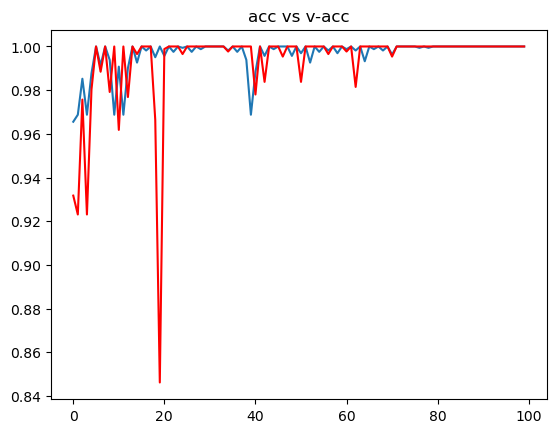

In [23]:
!pip install matplotlib
import matplotlib.pyplot as plt
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

# Ploting Accuracy In Training Set & Validation Set

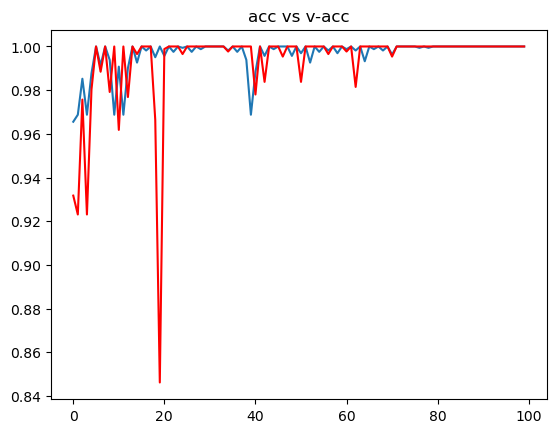

In [24]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

# Ploting Loss In Training Set & Validation Set

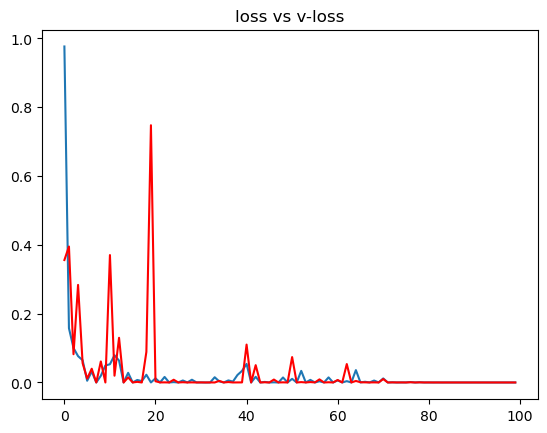

In [25]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

# Checking the file location is present or not

In [28]:
# checking the file location is present or not [DEMO]
'''
import numpy as np
from tensorflow.keras.preprocessing import image

def cancerPrediction(path):
    classes_dir = ["Dyskeratotic", "Koilocytotic", "Metaplastic", "Parabasal", "Superficial-Intermediate"]
    img = image.load_img(path, target_size=(224, 224))
    norm_img = image.img_to_array(img) / 255.0
    input_arr_img = np.array([norm_img])
    pred = np.argmax(model.predict(input_arr_img))
    print(classes_dir[pred])
path = "/home/iamsanko/Downloads/Test 1/test/Parabasal/007.jpg"
cancerPrediction(path)'''


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Parabasal


In [29]:
import os

def batchCancerPrediction(directory):
    for filename in os.listdir(directory):
        path = os.path.join(directory, filename)
        print(f"Processing: {filename}")
        cancerPrediction(path)
local_directory = "/home/iamsanko/Downloads/Test 1/test/Koilocytotic"
batchCancerPrediction(local_directory)

Processing: 004.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
Koilocytotic
Processing: 012.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
Koilocytotic
Processing: 011.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
Koilocytotic
Processing: 005.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
Koilocytotic
Processing: 009.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
Koilocytotic
Processing: 006.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
Koilocytotic
Processing: 007.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
Koilocytotic
Processing: 010.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
Koilocytotic
Processing: 013.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
Koilocytotic
Processing: 014.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
Koilocytotic
Processing: 001.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
Superficial-Intermediate
Processing: 003.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
Koilocytotic
Processing: 008.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
Koilocytotic
Processing: 002.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161m

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import optuna
class SimpleCNN(nn.Module):
    def __init__(self, filters, dropout_rate, dense_units):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, filters, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(filters, filters * 2, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.dropout = nn.Dropout(dropout_rate)
        self.fc1 = nn.Linear(filters * 2 * 16 * 16, dense_units)  
        self.fc2 = nn.Linear(dense_units, 5) 

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = x.view(-1, self.num_flat_features(x))
        x = self.dropout(x)
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  
        num_features = 1
        for s in size:
            num_features *= s
        return num_features
transform = transforms.Compose([
    transforms.Resize((64, 64)),  # Resize to 64x64
    transforms.ToTensor(),
])
train_data = datasets.ImageFolder(root='/home/iamsanko/Downloads/Test 1/train', transform=transform)
val_data = datasets.ImageFolder(root='/home/iamsanko/Downloads/Test 1/val', transform=transform)

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
val_loader = DataLoader(val_data, batch_size=64, shuffle=False)
def objective(trial):
    filters = trial.suggest_int("filters", 16, 128)
    dropout_rate = trial.suggest_float("dropout_rate", 0.0, 0.5)
    dense_units = trial.suggest_int("dense_units", 32, 128)
    learning_rate = trial.suggest_float("learning_rate", 1e-5, 1e-2, log=True)

    model = SimpleCNN(filters, dropout_rate, dense_units)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    criterion = nn.CrossEntropyLoss()
    model.train()
    for epoch in range(10):  #defined the ranges upto 10+- 
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    return accuracy
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

print("Best trial:")
trial = study.best_trial
print("  Value: {}".format(trial.value))
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value)) # took 11hrs & 28mito run


[I 2024-09-29 20:01:24,916] A new study created in memory with name: no-name-fb477780-8693-4213-ad69-c9f5e7800b65
[I 2024-09-29 20:05:03,648] Trial 0 finished with value: 0.928164196123147 and parameters: {'filters': 36, 'dropout_rate': 0.07492744765636328, 'dense_units': 72, 'learning_rate': 0.004478865574974525}. Best is trial 0 with value: 0.928164196123147.
[I 2024-09-29 20:07:23,812] Trial 1 finished with value: 0.935005701254276 and parameters: {'filters': 57, 'dropout_rate': 0.3249980585697148, 'dense_units': 87, 'learning_rate': 5.664953772898972e-05}. Best is trial 1 with value: 0.935005701254276.
[I 2024-09-29 20:09:11,284] Trial 2 finished with value: 0.8916761687571265 and parameters: {'filters': 37, 'dropout_rate': 0.10920142955492323, 'dense_units': 119, 'learning_rate': 2.009319907890419e-05}. Best is trial 1 with value: 0.935005701254276.
[I 2024-09-29 20:12:36,974] Trial 3 finished with value: 0.95096921322691 and parameters: {'filters': 79, 'dropout_rate': 0.167951025

Best trial:
  Value: 0.9680729760547321
  Params: 
    filters: 108
    dropout_rate: 0.36821133628071573
    dense_units: 122
    learning_rate: 0.0007581239747499647


In [54]:
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def load_images_from_directory(data_dir, target_size=(32, 32)):
    images = []
    for filename in os.listdir(data_dir):
        img_path = os.path.join(data_dir, filename)
        if os.path.isfile(img_path):
            img = load_img(img_path, target_size=target_size, color_mode='grayscale')
            img_array = img_to_array(img)
            img_array = (img_array - 127.5) / 127.5  # Normalize to [-1, 1]
            images.append(img_array)
    return np.array(images)

data_dir = '/home/iamsanko/Downloads/Test 1/output'
X_train = load_images_from_directory(data_dir)


## Building a generator checker
 With the help of Fn. generator from the previous cell's has the model and which was needed to add the latest dimention

In [55]:
def build_generator(latent_dim):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(128 * 8 * 8, input_dim=latent_dim))
    model.add(tf.keras.layers.LeakyReLU(alpha=0.2))
    model.add(tf.keras.layers.Reshape((8, 8, 128)))
    model.add(tf.keras.layers.UpSampling2D())
    model.add(tf.keras.layers.Conv2D(128, (5, 5), padding='same'))
    model.add(tf.keras.layers.LeakyReLU(alpha=0.2))
    model.add(tf.keras.layers.UpSampling2D())
    model.add(tf.keras.layers.Conv2D(64, (5, 5), padding='same'))
    model.add(tf.keras.layers.LeakyReLU(alpha=0.2))
    model.add(tf.keras.layers.Conv2D(1, (5, 5), padding='same', activation='tanh'))
    return model

In [56]:
def build_discriminator(img_shape):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(64, (5, 5), padding='same', input_shape=img_shape))
    model.add(tf.keras.layers.LeakyReLU(alpha=0.2))
    model.add(tf.keras.layers.Dropout(0.3))
    model.add(tf.keras.layers.Conv2D(128, (5, 5), padding='same'))
    model.add(tf.keras.layers.LeakyReLU(alpha=0.2))
    model.add(tf.keras.layers.Dropout(0.3))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    return model


In [57]:
# Dimensions
img_shape = (32, 32, 1)  
latent_dim = 100
generator = build_generator(latent_dim)
discriminator = build_discriminator(img_shape)
discriminator.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
discriminator.trainable = False
gan_input = tf.keras.Input(shape=(latent_dim,))
generated_image = generator(gan_input)
gan_output = discriminator(generated_image)
gan = tf.keras.Model(gan_input, gan_output)
gan.compile(loss='binary_crossentropy', optimizer='adam')


/home/iamsanko/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/home/iamsanko/anaconda3/lib/python3.11/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
/home/iamsanko/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [58]:
def train_gan(epochs, batch_size):
    for epoch in range(epochs):
        idx = np.random.randint(0, X_train.shape[0], batch_size)
        real_images = X_train[idx]

        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        fake_images = generator.predict(noise)

        real_labels = np.ones((batch_size, 1))
        fake_labels = np.zeros((batch_size, 1))

        d_loss_real = discriminator.train_on_batch(real_images, real_labels)
        d_loss_fake = discriminator.train_on_batch(fake_images, fake_labels)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        valid_labels = np.ones((batch_size, 1))
        g_loss = gan.train_on_batch(noise, valid_labels)
        print(f"{epoch}/{epochs} [D loss: {d_loss[0]:.4f}, acc.: {d_loss[1]:.2f}] [G loss: {g_loss:.4f}]")


# Check the shape is got inn

In [60]:
print("X_train shape:", X_train.shape)

X_train shape: (0,)


In [62]:
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array

data_dir = '/home/iamsanko/Downloads/Test 1/output'
X_train = []

# Load images
for filename in os.listdir(data_dir):
    img_path = os.path.join(data_dir, filename)
    if img_path.endswith('.png') or img_path.endswith('.jpg'):
        img = load_img(img_path, target_size=(64, 64)) 
        img_array = img_to_array(img)
        X_train.append(img_array)
X_train = np.array(X_train)

print("Loaded images shape:", X_train.shape) 



Loaded images shape: (0,)


In [63]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import os
import numpy as np

data_dir = '/home/iamsanko/Downloads/Test 1/output'
X_train = []

# Load images
for filename in os.listdir(data_dir):
    img_path = os.path.join(data_dir, filename)
    if img_path.endswith('.png') or img_path.endswith('.jpg'):
        try:
            img = load_img(img_path, target_size=(64, 64))  # Adjust size as needed
            img_array = img_to_array(img)
            X_train.append(img_array)
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")

# Convert list to numpy array
X_train = np.array(X_train)
print("Loaded images shape:", X_train.shape)  # Should show the number of loaded images


Loaded images shape: (0,)


In [64]:
import os

data_dir = '/home/iamsanko/Downloads/Test 1/output'
print("Files in directory:", os.listdir(data_dir))


Files in directory: ['val', 'train', 'test']


In [67]:
import os

data_dir = '/home/iamsanko/Downloads/Test 1/output'
files = os.listdir(data_dir)
print("Files in directory:", files)


Files in directory: ['val', 'train', 'test']


# Checking the directory

In [69]:
import os
data_dir = '/home/iamsanko/Downloads/Test 1/output'
if os.path.exists(data_dir):
    print("Directory exists.")
else:
    print("Directory does not exist.")


Directory exists.


In [73]:
import os
import cv2
import numpy as np
data_dir = '/home/iamsanko/Downloads/Test 1/output'
target_size = (64, 64)  
images = []
for subdir, _, files in os.walk(data_dir):
    for file in files:
        if file.endswith(('.jpg', '.jpeg')): 
            file_path = os.path.join(subdir, file)
            img = cv2.imread(file_path)  
            if img is not None:
                img_resized = cv2.resize(img, target_size)  
                images.append(img_resized)
X_train = np.array(images)

print("Loaded images shape:", X_train.shape)


Loaded images shape: (896, 64, 64, 3)


In [74]:
from sklearn.model_selection import train_test_splitX_train, X_temp = train_test_split(X_train, test_size=0.4, random_state=42)  # 60% train, 40% temp
X_val, X_test = train_test_split(X_temp, test_size=0.5, random_state=42)  # 20% val, 20% test

print(f'Training set shape: {X_train.shape}')
print(f'Validation set shape: {X_val.shape}')
print(f'Test set shape: {X_test.shape}')


Training set shape: (537, 64, 64, 3)
Validation set shape: (179, 64, 64, 3)
Test set shape: (180, 64, 64, 3)


In [75]:
from keras.models import Sequential
from keras.layers import Dense, Reshape, Flatten, LeakyReLU

def build_generator(latent_dim):
    model = Sequential()
    model.add(Dense(256, input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(1024))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(64 * 64 * 3, activation='tanh'))  
    model.add(Reshape((64, 64, 3)))
    return model

latent_dim = 100
generator = build_generator(latent_dim)


/home/iamsanko/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/home/iamsanko/anaconda3/lib/python3.11/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [76]:
from keras.models import Sequential
from keras.layers import Dense, Reshape, Flatten, LeakyReLU

def build_generator(latent_dim):
    model = Sequential()
    model.add(Dense(256, input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(1024))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(64 * 64 * 3, activation='tanh'))  # Assuming images are 64x64x3
    model.add(Reshape((64, 64, 3)))
    return model

latent_dim = 100
generator = build_generator(latent_dim)


In [77]:
from keras.layers import Conv2D, Dropout

def build_discriminator():
    model = Sequential()
    model.add(Conv2D(64, kernel_size=3, strides=2, input_shape=(64, 64, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.25))
    model.add(Conv2D(128, kernel_size=3, strides=2, padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    return model

discriminator = build_discriminator()


/home/iamsanko/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [3]:
from sklearn.model_selection import train_test_split
from torchvision import datasets, transforms


transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Resize images to 128x128
    transforms.ToTensor()
])

# Load your dataset (Assuming you're using image data from a folder)
dataset = datasets.ImageFolder(root='/home/iamsanko/Downloads/Test 1/output', transform=transform)

# Split the dataset
X_train, X_temp = train_test_split(dataset, test_size=0.4, random_state=42)  # 60% train, 40% temp
X_val, X_test = train_test_split(X_temp, test_size=0.5, random_state=42)  # 20% val, 20% test


In [8]:
import torch 
from sklearn.model_selection import train_test_split
from torchvision import datasets, transforms

transform = transforms.Compose([
    transforms.Resize((128, 128)),  
    transforms.ToTensor() 
])
dataset = datasets.ImageFolder(root='/home/iamsanko/Downloads/Test 1/output', transform=transform)
train_size = int(0.6 * len(dataset))
val_test_size = len(dataset) - train_size
val_size = int(0.5 * val_test_size)
test_size = val_test_size - val_size
X_train, X_val, X_test = torch.utils.data.random_split(dataset, [train_size, val_size, test_size])

In [12]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
class Generator(nn.Module):
    def __init__(self, noise_dim):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(noise_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, 28 * 28),
            nn.Tanh()
        )

    def forward(self, x):
        return self.model(x).view(-1, 1, 28, 28)  # Output as 1 channel 28x28 image

# Define Discriminator
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(28 * 28, 512),  # Input size = 28*28 (grayscale image)
            nn.LeakyReLU(0.2),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = x.view(x.size(0), -1)  # [batch_size, 784]
        return self.model(x)

# Hyperparameters
batch_size = 64
noise_dim = 100
lr = 0.0002
num_epochs = 200

# Data preparation
transform = transforms.Compose([
    transforms.Resize(28),
    transforms.Grayscale(num_output_channels=1),  
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5]) 
])

dataset = datasets.ImageFolder(root='/home/iamsanko/Downloads/Test 1/output', transform=transform)
train_size = int(0.6 * len(dataset))
val_size = int(0.2 * len(dataset))
test_size = len(dataset) - train_size - val_size

train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, val_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
generator = Generator(noise_dim=noise_dim)
discriminator = Discriminator()
criterion = nn.BCELoss()
optimizer_g = torch.optim.Adam(generator.parameters(), lr=lr)
optimizer_d = torch.optim.Adam(discriminator.parameters(), lr=lr)
def generate_noise(batch_size, noise_dim):
    return torch.randn(batch_size, noise_dim)
for epoch in range(num_epochs):
    for real_images, _ in train_loader:
        batch_size = real_images.size(0)
        real_labels = torch.ones(batch_size, 1)
        fake_labels = torch.zeros(batch_size, 1)
        optimizer_d.zero_grad()
        outputs = discriminator(real_images).view(batch_size, -1) 
        d_loss_real = criterion(outputs, real_labels)
        noise = generate_noise(batch_size, noise_dim)
        fake_images = generator(noise)
        outputs = discriminator(fake_images.detach()).view(batch_size, -1)  
        d_loss_fake = criterion(outputs, fake_labels)
        d_loss = d_loss_real + d_loss_fake
        d_loss.backward()
        optimizer_d.step()
        optimizer_g.zero_grad()
        noise = generate_noise(batch_size, noise_dim)
        fake_images = generator(noise)
        outputs = discriminator(fake_images).view(batch_size, -1) 
        g_loss = criterion(outputs, real_labels)
        g_loss.backward()
        optimizer_g.step()
    print(f'Epoch [{epoch+1}/{num_epochs}], d_loss: {d_loss.item():.4f}, g_loss: {g_loss.item():.4f}')
print("Training complete.")


Epoch [1/200], d_loss: 1.2584, g_loss: 0.5565
Epoch [2/200], d_loss: 1.5970, g_loss: 0.4319
Epoch [3/200], d_loss: 0.9119, g_loss: 1.9698
Epoch [4/200], d_loss: 1.5119, g_loss: 1.3555
Epoch [5/200], d_loss: 1.2815, g_loss: 1.7102
Epoch [6/200], d_loss: 0.7097, g_loss: 1.7032
Epoch [7/200], d_loss: 0.6447, g_loss: 1.2189
Epoch [8/200], d_loss: 0.9148, g_loss: 0.6256
Epoch [9/200], d_loss: 1.3164, g_loss: 0.3703
Epoch [10/200], d_loss: 1.6234, g_loss: 0.3002
Epoch [11/200], d_loss: 0.9819, g_loss: 0.7527
Epoch [12/200], d_loss: 0.4128, g_loss: 2.1738
Epoch [13/200], d_loss: 0.4211, g_loss: 1.5668
Epoch [14/200], d_loss: 0.9881, g_loss: 0.6622
Epoch [15/200], d_loss: 1.7048, g_loss: 0.3602
Epoch [16/200], d_loss: 0.9059, g_loss: 1.1275
Epoch [17/200], d_loss: 0.4375, g_loss: 2.2173
Epoch [18/200], d_loss: 0.6386, g_loss: 1.2223
Epoch [19/200], d_loss: 0.8271, g_loss: 0.7742
Epoch [20/200], d_loss: 1.1085, g_loss: 0.5793
Epoch [21/200], d_loss: 0.9667, g_loss: 0.6743
Epoch [22/200], d_loss

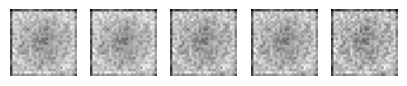

In [14]:
def show_generated_images(generator, num_images, noise_dim):
    noise = generate_noise(num_images, noise_dim)
    fake_images = generator(noise)
    fake_images = fake_images * 0.5 + 0.5  # Denormalize to [0, 1]

    fig, axes = plt.subplots(1, num_images, figsize=(num_images, 1))
    for i in range(num_images):
        axes[i].imshow(fake_images[i].squeeze(0).cpu().detach().numpy(), cmap='gray')
        axes[i].axis('off')
    plt.show()
show_generated_images(generator, num_images=5, noise_dim=noise_dim)


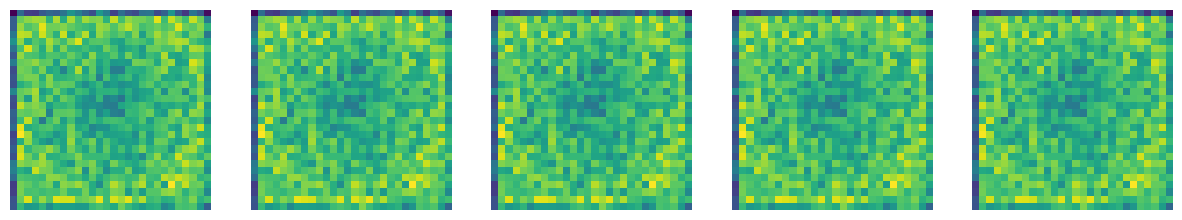

In [15]:
import matplotlib.pyplot as plt
def generate_and_show_images(generator, noise_dim, num_images=5):
    generator.eval() 
    noise = generate_noise(num_images, noise_dim).to(device) 
    with torch.no_grad():
        fake_images = generator(noise).cpu() 
    fake_images = (fake_images * 0.5 + 0.5).clamp(0, 1) 
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    for i in range(num_images):
        img = fake_images[i].permute(1, 2, 0)  
        axes[i].imshow(img)
        axes[i].axis('off')
    plt.show()
generate_and_show_images(generator, noise_dim)


In [16]:
import torch
import matplotlib.pyplot as plt
import os
def generate_and_save_images(generator, noise_dim, num_images, save_dir):
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    generator.eval()
    noise = torch.randn(num_images, noise_dim).to(device)
    with torch.no_grad():
        fake_images = generator(noise).cpu()
    for i in range(num_images):
        img = fake_images[i].squeeze().numpy()
        plt.imsave(os.path.join(save_dir, f"generated_image_{i+1}.png"), img, cmap='gray')
num_images = 10
noise_dim = 100
save_dir = "/home/iamsanko/Downloads/generated_images"
generate_and_save_images(generator, noise_dim, num_images, save_dir)


In [17]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Set paths
train_dir = '/home/iamsanko/Downloads/Test 1/output/train'
val_dir = '/home/iamsanko/Downloads/Test 1/output/val'
test_dir = '/home/iamsanko/Downloads/Test 1/output/test'
transform = transforms.Compose([
    transforms.Resize((64, 64)),  # Resize to 64x64 (standard GAN input)
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])  # Normalize between [-1, 1] for Tanh output
])
train_dataset = datasets.ImageFolder(train_dir, transform=transform)
val_dataset = datasets.ImageFolder(val_dir, transform=transform)
test_dataset = datasets.ImageFolder(test_dir, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


In [18]:
import torch.nn as nn

class Generator(nn.Module):
    def __init__(self, noise_dim):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(noise_dim, 256),
            nn.ReLU(True),
            nn.Linear(256, 512),
            nn.ReLU(True),
            nn.Linear(512, 1024),
            nn.ReLU(True),
            nn.Linear(1024, 64*64*1),  
            nn.Tanh()  
        )
    def forward(self, z):
        img = self.model(z)
        img = img.view(img.size(0), 1, 64, 64)  # Reshape to image dimensions
        return img

In [19]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(64*64*1, 1024),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 1),
            nn.Sigmoid() 
        )

    def forward(self, img):
        img_flat = img.view(img.size(0), -1)
        validity = self.model(img_flat)
        return validity


In [21]:
class Generator(nn.Module):
    def __init__(self, noise_dim):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(noise_dim, 256),
            nn.ReLU(True),
            nn.Linear(256, 512),
            nn.ReLU(True),
            nn.Linear(512, 1024),
            nn.ReLU(True),
            nn.Linear(1024, 64*64*3),  # Change this to 64*64*3 for RGB
            nn.Tanh()  # Output range [-1, 1]
        )
    def forward(self, z):
        img = self.model(z)
        img = img.view(img.size(0), 3, 64, 64)  # Change to 3 channels
        return img


In [22]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(64*64*3, 1024), 
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 1),
            nn.Sigmoid()  
        )
    def forward(self, img):
        img_flat = img.view(img.size(0), -1)  
        validity = self.model(img_flat)
        return validity


In [23]:
import torch.optim as optim
import torch
noise_dim = 100
generator = Generator(noise_dim).to(device)
discriminator = Discriminator().to(device)
criterion = nn.BCELoss()
optimizer_g = optim.Adam(generator.parameters(), lr=0.0002)
optimizer_d = optim.Adam(discriminator.parameters(), lr=0.0002)
epochs = 100
for epoch in range(epochs):
    for i, (real_images, _) in enumerate(train_loader):
        real_images = real_images.to(device)
        batch_size = real_images.size(0)

        # Labels
        real_labels = torch.ones(batch_size, 1).to(device)
        fake_labels = torch.zeros(batch_size, 1).to(device)
        optimizer_d.zero_grad()

        # Real images
        outputs_real = discriminator(real_images)
        d_loss_real = criterion(outputs_real, real_labels)

        # Fake images
        noise = torch.randn(batch_size, noise_dim).to(device)
        fake_images = generator(noise)
        outputs_fake = discriminator(fake_images.detach())  # Detach so generator is not updated
        d_loss_fake = criterion(outputs_fake, fake_labels)

        # Total discriminator loss
        d_loss = d_loss_real + d_loss_fake
        d_loss.backward()
        optimizer_d.step()
        optimizer_g.zero_grad()
        outputs_fake = discriminator(fake_images)
        g_loss = criterion(outputs_fake, real_labels)
        g_loss.backward()
        optimizer_g.step()
    print(f"Epoch [{epoch+1}/{epochs}] | D Loss: {d_loss.item()} | G Loss: {g_loss.item()}")


Epoch [1/100] | D Loss: 0.9842427968978882 | G Loss: 0.7698355317115784
Epoch [2/100] | D Loss: 1.7141879796981812 | G Loss: 1.0247533321380615
Epoch [3/100] | D Loss: 0.17828479409217834 | G Loss: 2.9229345321655273
Epoch [4/100] | D Loss: 0.6865127682685852 | G Loss: 0.9690119624137878
Epoch [5/100] | D Loss: 0.47508054971694946 | G Loss: 1.0982474088668823
Epoch [6/100] | D Loss: 0.2184382826089859 | G Loss: 1.8230900764465332
Epoch [7/100] | D Loss: 0.4037191569805145 | G Loss: 1.765008568763733
Epoch [8/100] | D Loss: 0.10448507964611053 | G Loss: 3.2011473178863525
Epoch [9/100] | D Loss: 0.03805321827530861 | G Loss: 5.258705139160156
Epoch [10/100] | D Loss: 0.03365657106041908 | G Loss: 6.265377044677734
Epoch [11/100] | D Loss: 0.09067761898040771 | G Loss: 6.335056781768799
Epoch [12/100] | D Loss: 0.07083749026060104 | G Loss: 8.40924072265625
Epoch [13/100] | D Loss: 0.03873594105243683 | G Loss: 9.325901985168457
Epoch [14/100] | D Loss: 0.11320313811302185 | G Loss: 10.8

In [26]:
import os
import matplotlib.pyplot as plt
import numpy as np
import torch
def generate_images(generator, num_images, noise_dim):
    noise = torch.randn(num_images, noise_dim).to(device)
    fake_images = generator(noise).cpu().detach()
    return fake_images
def save_generated_images(fake_images, save_path):
    if not os.path.exists(save_path):
        os.makedirs(save_path)
    for i, img in enumerate(fake_images):
        img = img.permute(1, 2, 0).numpy()  
        img = (img + 1) / 2  
        plt.imsave(f"{save_path}/image_{i+1}.png", img)
num_images = 10
generated_images = generate_images(generator, num_images, noise_dim)
save_path = "/home/iamsanko/Downloads/generated_images"
save_generated_images(generated_images, save_path)


In [27]:
import torch 
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
data_dir = '/home/iamsanko/Downloads/Test 1/output'
transform = transforms.Compose([
    transforms.Resize((64, 64)),  
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])  
])
my_dataset = datasets.ImageFolder(root=data_dir, transform=transform)
dataset_size = len(my_dataset)
train_size = int(0.6 * dataset_size)  # 60% for training
val_size = int(0.2 * dataset_size)    # 20% for validation
test_size = dataset_size - train_size - val_size 
train_dataset, val_dataset, test_dataset = random_split(my_dataset, [train_size, val_size, test_size])
batch_size = 64 
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
print(f"Training set size: {len(train_loader.dataset)}")
print(f"Validation set size: {len(val_loader.dataset)}")
print(f"Test set size: {len(test_loader.dataset)}")


Training set size: 537
Validation set size: 179
Test set size: 180


In [29]:
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader]
transform = transforms.Compose([
    transforms.Resize((64, 64)),  
    transforms.ToTensor(),         
])
train_dataset = ImageFolder(root='/home/iamsanko/Downloads/Test 1/output/train', transform=transform)
val_dataset = ImageFolder(root='//home/iamsanko/Downloads/Test 1/output/val', transform=transform)
test_dataset = ImageFolder(root='/home/iamsanko/Downloads/Test 1/output/test', transform=transform)
train_data_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_data_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_data_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


In [36]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
class SimpleNN(nn.Module):
    def __init__(self, input_size, num_classes):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x
input_size = 10 
num_classes = 4 
num_samples = 100  
X = torch.randn(num_samples, input_size)
y = torch.randint(0, num_classes + 1, (num_samples,))
y[y == 4] = 3
dataset = TensorDataset(X, y)
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleNN(input_size, num_classes).to(device)
criterion = nn.CrossEntropyLoss()  
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 5

for epoch in range(num_epochs):
    model.train()  
    total_loss = 0

    for inputs, labels in dataloader:
        inputs, labels = inputs.to(device), labels.to(device)  

        # Forward pass
        outputs = model(inputs)

        # Calculate loss
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    # Average loss for the epoch
    avg_loss = total_loss / len(dataloader)
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {avg_loss:.4f}')

print("Training complete!")


Epoch [1/5], Loss: 1.3668
Epoch [2/5], Loss: 1.3509
Epoch [3/5], Loss: 1.3196
Epoch [4/5], Loss: 1.2726
Epoch [5/5], Loss: 1.2536
Training complete!


In [37]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

# Example neural network
class SimpleNN(nn.Module):
    def __init__(self, input_size, num_classes):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x


input_size = 10  
num_classes = 4  
num_samples = 100  
X = torch.randn(num_samples, input_size)
y = torch.randint(0, num_classes + 1, (num_samples,))
y[y == 4] = 3 
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Create DataLoaders
train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)
test_loader = DataLoader(test_dataset, batch_size=16)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleNN(input_size, num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)  # Move data to device
        # Forward pass
        outputs = model(inputs)
        # Calculate loss
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    avg_loss = total_loss / len(train_loader)
    model.eval() 
    val_loss = 0
    correct = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device) 
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            correct += (predicted == labels).sum().item()
    avg_val_loss = val_loss / len(val_loader)
    val_accuracy = correct / len(val_dataset)

    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {avg_loss:.4f}, Val Loss: {avg_val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}')

# Testing phase
model.eval()
test_loss = 0
correct = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device) 
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        test_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        correct += (predicted == labels).sum().item()
avg_test_loss = test_loss / len(test_loader)
test_accuracy = correct / len(test_dataset)
print(f'Test Loss: {avg_test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')
print("Training and testing complete!")


Epoch [1/5], Loss: 1.3229, Val Loss: 1.4607, Val Accuracy: 0.1333
Epoch [2/5], Loss: 1.2498, Val Loss: 1.4654, Val Accuracy: 0.1333
Epoch [3/5], Loss: 1.2068, Val Loss: 1.4774, Val Accuracy: 0.1333
Epoch [4/5], Loss: 1.1723, Val Loss: 1.4922, Val Accuracy: 0.1333
Epoch [5/5], Loss: 1.1595, Val Loss: 1.5084, Val Accuracy: 0.2000
Test Loss: 1.2765, Test Accuracy: 0.3333
Training and testing complete!


In [41]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
class SimpleNN(nn.Module):
    def __init__(self, input_size, num_classes):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, num_classes)
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x
input_size = 10
num_classes = 4
num_samples = 100
X = torch.randn(num_samples, input_size)
y = torch.randint(0, num_classes, (num_samples,))
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)
test_dataset = TensorDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)
test_loader = DataLoader(test_dataset, batch_size=16)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleNN(input_size, num_classes).to(device)
criterion = nn.CrossEntropyLoss()  
optimizer = optim.Adam(model.parameters(), lr=0.001)
num_epochs = 5

for epoch in range(num_epochs):
    model.train()  
    total_loss = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)  
        # Forward pass
        outputs = model(inputs)
        # Calculate loss
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    avg_loss = total_loss / len(train_loader)
    model.eval() 
    val_loss = 0
    correct = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)  # Move data to device
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            correct += (predicted == labels).sum().item()
    avg_val_loss = val_loss / len(val_loader)
    val_accuracy = correct / len(val_dataset)
    print(f'Epoch [{epoch + 1}/{num_epochs}], Train Loss: {avg_loss:.4f}, '
          f'Validation Loss: {avg_val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}')
model.eval() 
test_loss = 0
test_correct = 0
y_test_pred = []  
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device) 
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        test_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        test_correct += (predicted == labels).sum().item()
        y_test_pred.extend(predicted.cpu().numpy())
avg_test_loss = test_loss / len(test_loader)
test_accuracy = test_correct / len(test_dataset)
test_validation_accuracy = accuracy_score(y_test.cpu().numpy(), y_test_pred)
print(f'Test Loss: {avg_test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}, Tes Validation: {test_validation_accuracy:.4f}')
print("Training and testing complete!")


Epoch [1/5], Train Loss: 1.3989, Validation Loss: 1.3531, Validation Accuracy: 0.4667
Epoch [2/5], Train Loss: 1.3680, Validation Loss: 1.3323, Validation Accuracy: 0.4667
Epoch [3/5], Train Loss: 1.3294, Validation Loss: 1.3165, Validation Accuracy: 0.5333
Epoch [4/5], Train Loss: 1.3124, Validation Loss: 1.2979, Validation Accuracy: 0.4667
Epoch [5/5], Train Loss: 1.2914, Validation Loss: 1.2838, Validation Accuracy: 0.4000
Test Loss: 1.3337, Test Accuracy: 0.3333, Tes Validation: 0.3333
Training and testing complete!


In [46]:
import torch
import torch.nn.functional as F
from torchvision import models, transforms
from torchvision.utils import save_image
from PIL import Image
import numpy as np
from scipy.stats import entropy
def inception_score(images, splits=10):
    model = models.inception_v3(pretrained=True, transform_input=False).eval()
    if torch.cuda.is_available():
        model = model.cuda()
    preprocess = transforms.Compose([
        transforms.Resize((299, 299)),  
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  
    ])
    all_probs = []
    with torch.no_grad():
        for img in images:
            img = img.permute(1, 2, 0).cpu().numpy()  
            img = (img * 255).astype(np.uint8) 
            img = Image.fromarray(img)  
            img = preprocess(img).unsqueeze(0)  

            if torch.cuda.is_available():
                img = img.cuda()
            prob = F.softmax(model(img), dim=1).cpu().numpy()
            all_probs.append(prob)
    all_probs = np.concatenate(all_probs, axis=0)  
    scores = []
    for i in range(splits):
        part = all_probs[i * (len(all_probs) // splits): (i + 1) * (len(all_probs) // splits)]
        p_y = np.mean(part, axis=0)  
        score = np.exp(np.mean(entropy(part, p_y)) )
        scores.append(score)
    return np.mean(scores), np.std(scores)
N = 100  # Number of generated images
C = 3    # Number of channels (RGB)
H = 64   # Height of the image
W = 64   # Width of the image
generated_images = torch.rand(N, C, H, W)
mean_score, std_score = inception_score(generated_images)
print(f'GAN Inception Score: {mean_score:.4f} ± {std_score:.4f}')


GAN Inception Score: 1.0586 ± 0.0153


In [3]:
import os
from PIL import Image
import torch
import torchvision.transforms as transforms
from torchvision.models import inception_v3
import torch.nn.functional as F
from torch.autograd import Variable
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
base_path = '/home/iamsanko/Downloads/Test 1/output'
train_path = os.path.join(base_path, 'train')
val_path = os.path.join(base_path, 'val')
test_path = os.path.join(base_path, 'test')
inception_model = inception_v3(pretrained=True, transform_input=False).to(device)
inception_model.eval()
preprocess = transforms.Compose([
    transforms.Resize((299, 299)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
def load_images_from_folder(folder):
    images = []
    for subdir in os.listdir(folder):
        subdir_path = os.path.join(folder, subdir)
        if os.path.isdir(subdir_path):
            for filename in os.listdir(subdir_path):
                img_path = os.path.join(subdir_path, filename)
                if img_path.endswith(".jpg") or img_path.endswith(".png") or img_path.endswith(".bmp"):
                    try:
                        img = Image.open(img_path).convert('RGB')
                        img_tensor = preprocess(img).unsqueeze(0) 
                        images.append(img_tensor)
                    except Exception as e:
                        print(f"Error loading image {img_path}: {e}")
    if images:
        return torch.cat(images) 
    return None
def inception_score(images, splits=10):
    if images is None or len(images) == 0:
        print("No images loaded, cannot calculate Inception Score.")
        return None
    all_scores = []
    for i in range(0, len(images), 32):  
        img_batch = images[i:i+32]
        img_batch = img_batch.to(device)
        with torch.no_grad():
            output = inception_model(img_batch)
        softmax_output = F.softmax(output, dim=1).cpu().numpy() 
        all_scores.append(softmax_output)
    all_scores = np.concatenate(all_scores, axis=0)
    scores = []
    num_images = len(all_scores)
    split_size = num_images // splits
    for k in range(splits):
        part = all_scores[k * split_size: (k + 1) * split_size, :]
        p_y = np.mean(part, axis=0)
        scores.append(np.exp(np.mean(np.sum(part * (np.log(part) - np.log(p_y)), axis=1))))
    return np.mean(scores), np.std(scores)
train_images = load_images_from_folder(train_path)
val_images = load_images_from_folder(val_path)
test_images = load_images_from_folder(test_path)
all_images = torch.cat([train_images, val_images, test_images]) if train_images is not None and val_images is not None and test_images is not None else None
if all_images is not None:
    mean_score, std_dev = inception_score(all_images)
    print(f'GAN Inception Score: {mean_score:.4f} ± {std_dev:.4f}')
else:
    print("Could not load images from the specified directories.")


GAN Inception Score: 2.4375 ± 0.2811
